In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))

%aimport utils
%aimport analyzers
%aimport processor
%aimport forecast
%aimport models

In [3]:
# Predictions Locations
prediction_folder = 'C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions'
RR_Norm_Prediction_Path = os.path.join(prediction_folder, '3ff', 'RR_norm_p1y.csv')
# GBM_Prediction_Path = os.path.join(prediction_folder, 'archived', 'RGBM_norm.csv')
LightGBM_Prediction_Path = os.path.join(prediction_folder, '3ff', 'RLGBM_norm_daily_p1y.csv')
GBM_RESFIT_Path = 'C:/Users/l5453/OneDrive/Documents/Projects/afp/forecasts/residuals/rlgbm_resfit.csv'

import pandas as pd


# Analyzer Arguments
task = 'yahoo'
# tickers = processor.YahooProcessor.get_all_tickers()
tickers = pd.read_csv(GBM_RESFIT_Path, index_col='Date').columns.tolist()
folder = None
freq = 'd'
fromdate = '2008-01-10'
todate = '2018-12-31'
forward_bars = 0

# Outlier Stocks
outliers = ['SAF', 'BHF']

# Plot Arguments
return_type = 'Daily Returns'

In [4]:
plotter = analyzers.Plotter(
    pred_paths=[
        RR_Norm_Prediction_Path,
#         GBM_Prediction_Path,
        LightGBM_Prediction_Path,
        GBM_RESFIT_Path
    ], 
    item_names=[
        'RR Daily Returns',
#         'GBM Daily Returns',
        'GBM Daily Returns',
        'GBM Residual Fit Daily Returns'
    ],
    fromdate=fromdate, 
    todate=todate,
    rolling_metrics=['squared_error', 'RMSE'],
    label_args={
        "tickers": tickers,
#         "tickers": ['AAPL', 'AMZN'],
        "task": "yahoo",
        "forward_bars": 0,
        "freq": "d",
        "folder": None
    }
)

In [5]:
plotter.set_analyzers()

2019-03-09 15:37:02,450 -  INFO   Loading Yahoo Labels...



2019-03-09 15:37:11,172 -  INFO   Loading Meta Data at C:\Users\l5453\OneDrive\Documents\Projects\afp\yahoos\yahoo_metas.csv
2019-03-09 15:37:11,189 -  INFO   Analyzing RR Daily Returns...
2019-03-09 15:37:11,191 -  INFO   Loading Predictions Files From C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions\3ff\RR_norm_p1y.csv



2019-03-09 15:37:43,100 -  INFO   Task Finished: 196 Attempted and 0 Failed.
2019-03-09 15:37:43,292 -  INFO   Analyzing GBM Daily Returns...
2019-03-09 15:37:43,294 -  INFO   Loading Predictions Files From C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions\3ff\RLGBM_norm_daily_p1y.csv



2019-03-09 15:38:14,282 -  INFO   Task Finished: 196 Attempted and 0 Failed.
2019-03-09 15:38:14,462 -  INFO   Analyzing GBM Residual Fit Daily Returns...
2019-03-09 15:38:14,463 -  INFO   Loading Predictions Files From C:/Users/l5453/OneDrive/Documents/Projects/afp/forecasts/residuals/rlgbm_resfit.csv



2019-03-09 15:38:40,182 -  INFO   Task Finished: 196 Attempted and 0 Failed.


## Overall Comparison

In [6]:
plotter.get_performance_table()

,(RMSE) RR Daily Returns,(RMSE) GBM Daily Returns,(RMSE) GBM Residual Fit Daily Returns
count,196.000000,196.000000,196.000000
mean,0.020174,0.020184,0.020262
std,0.006944,0.006967,0.007045
min,0.010680,0.010657,0.010703
25%,0.015063,0.015058,0.015097
50%,0.018579,0.018571,0.018605
75%,0.023570,0.023592,0.023686
max,0.046636,0.046785,0.047407


In [7]:
plotter.get_performance_table('Accuracy')

,(Accuracy) RR Daily Returns,(Accuracy) GBM Daily Returns,(Accuracy) GBM Residual Fit Daily Returns
count,196.000000,196.000000,196.000000
mean,0.508015,0.513045,0.511600
std,0.011599,0.010874,0.010470
min,0.476097,0.485880,0.486557
25%,0.500362,0.505793,0.503983
50%,0.507603,0.512129,0.511586
75%,0.515930,0.521723,0.517107
max,0.537292,0.537654,0.535119


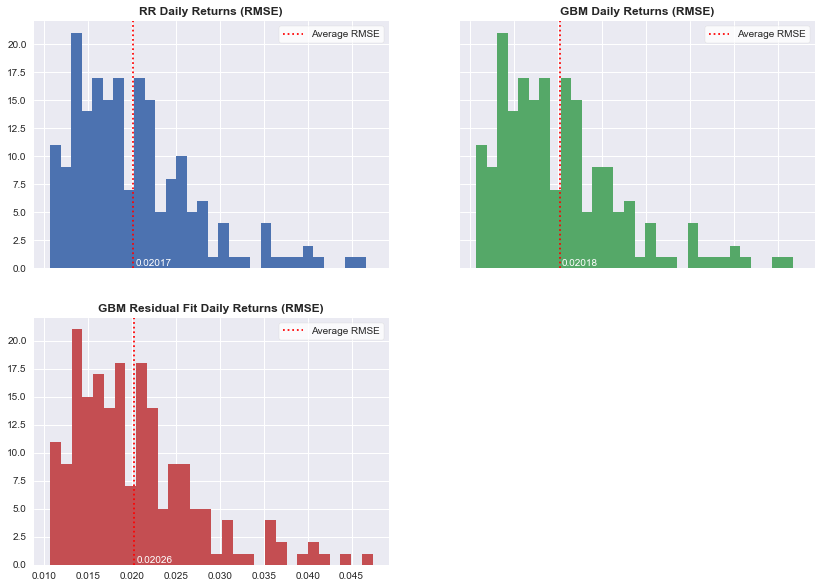

In [8]:
res = plotter.get_distribution_plot()

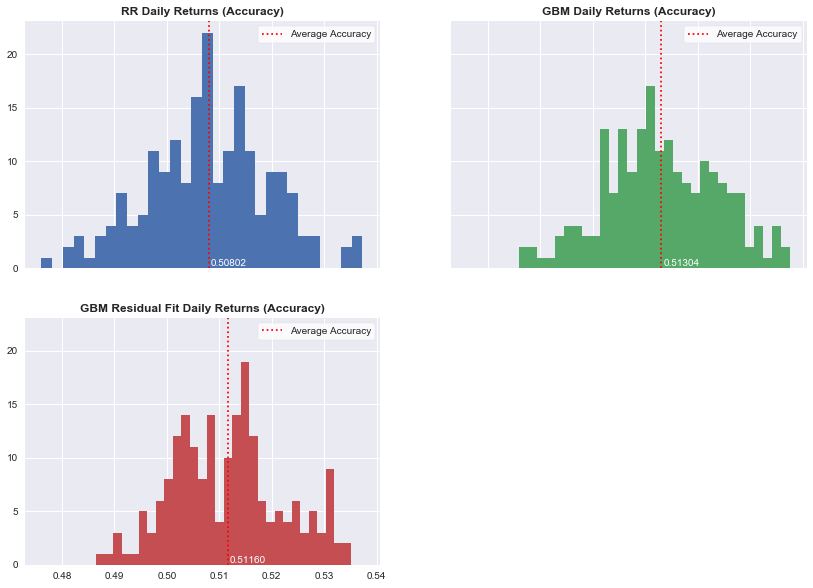

In [9]:
res = plotter.get_distribution_plot('Accuracy')

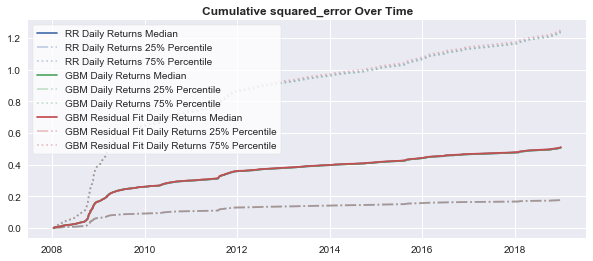

In [10]:
res = plotter.get_cumulative_metrics_plot()

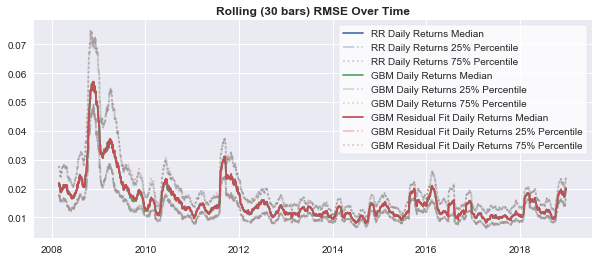

In [11]:
res = plotter.get_cumulative_metrics_plot("RMSE", q=(0.25, 0.75))

## Per Sector Comparison

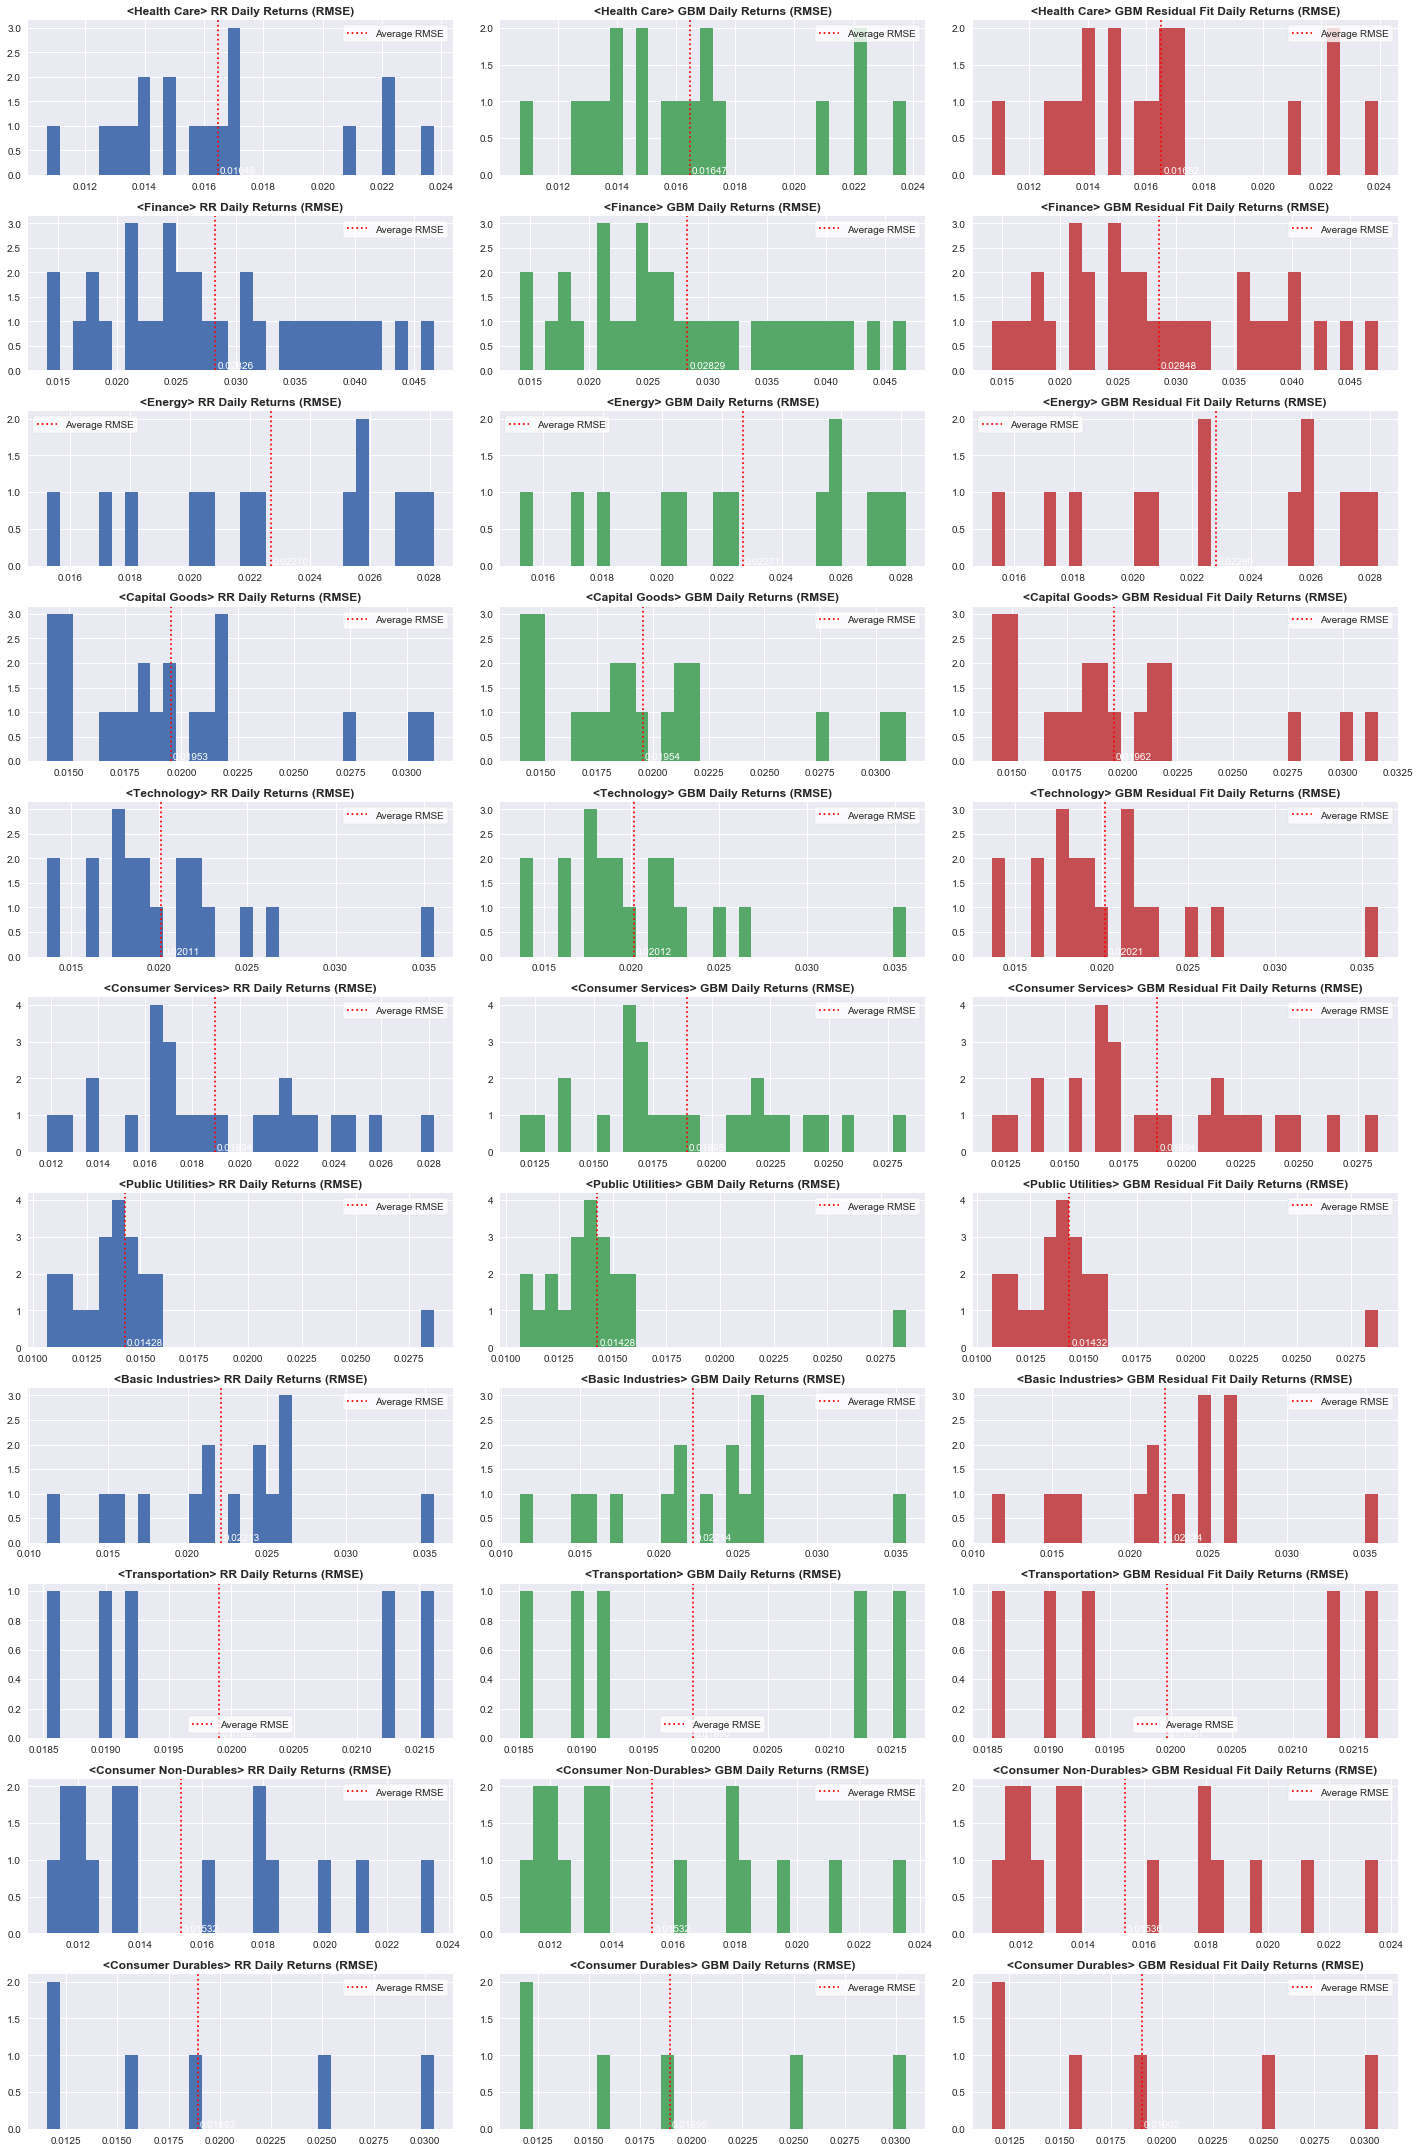

In [14]:
_ = plotter.get_sector_distributions(figsize=(20,30))

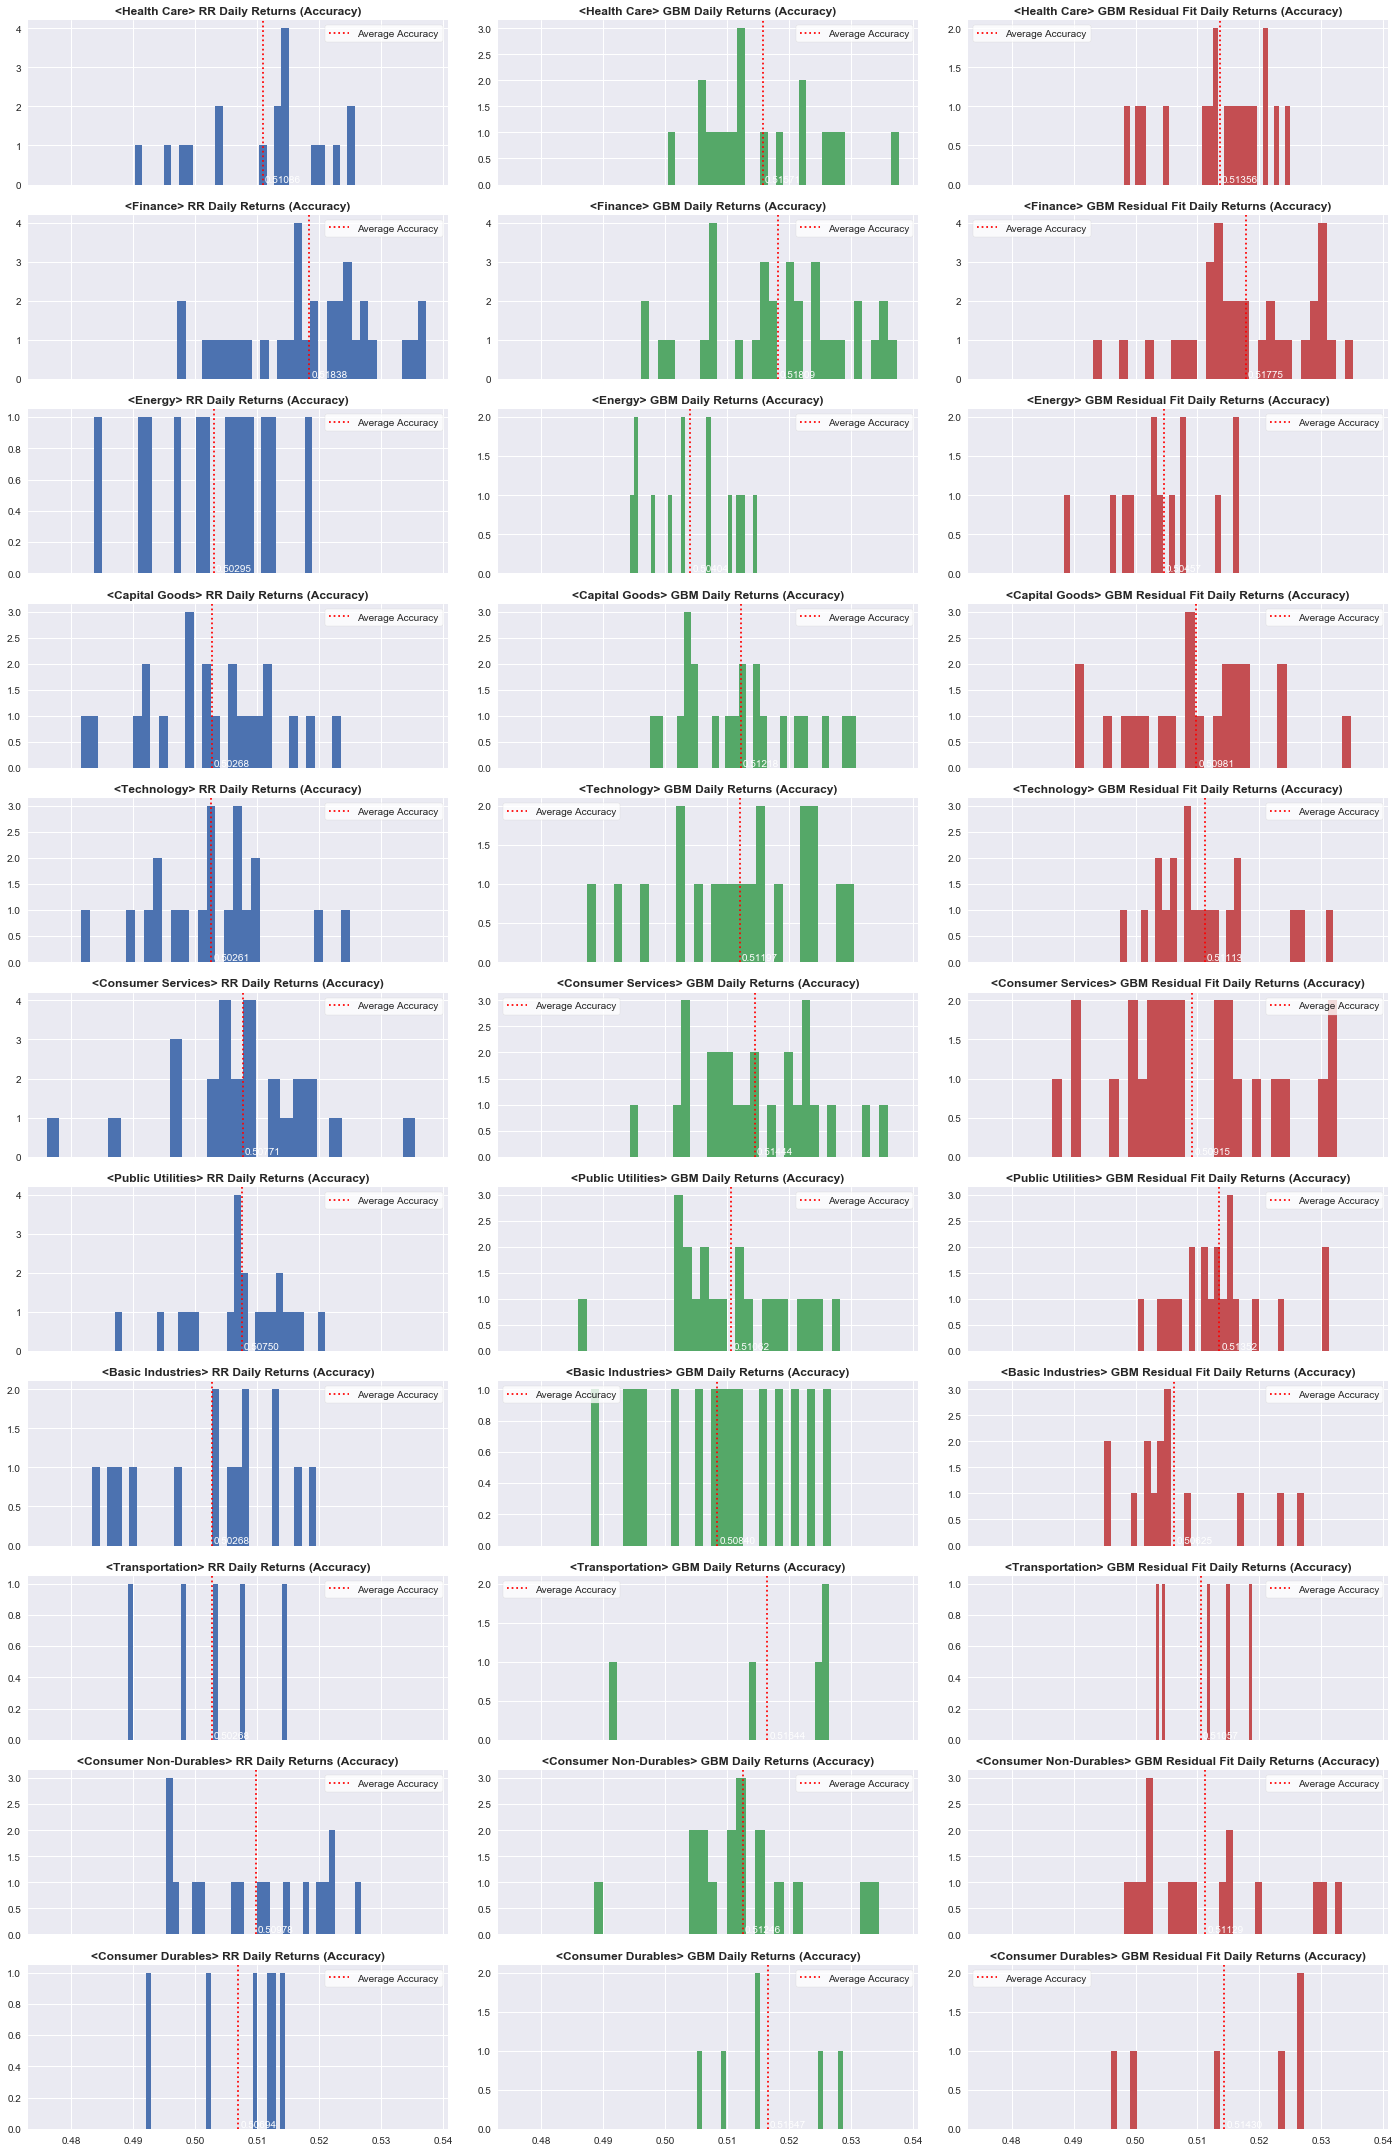

In [16]:
_ = plotter.get_sector_distributions("Accuracy",figsize=(20,30),sharex=True)

## Market Cap Quantile Comparison

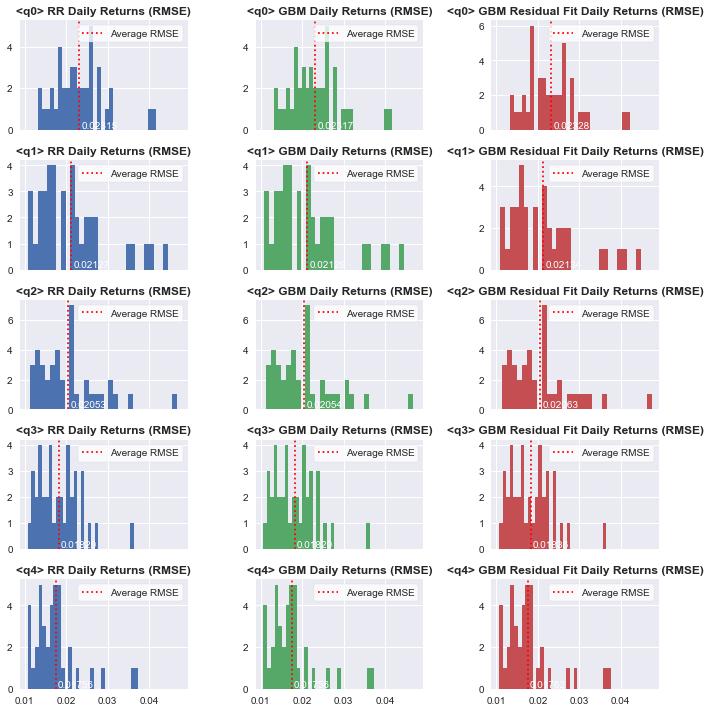

In [17]:
_ = plotter.get_marketcap_distribution()

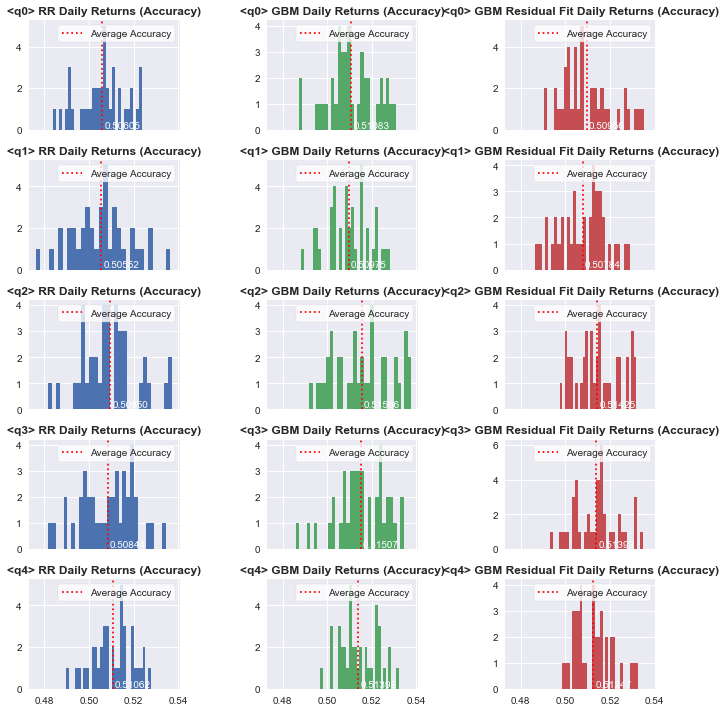

In [18]:
_ = plotter.get_marketcap_distribution("Accuracy")